<a href="https://www.kaggle.com/code/duniaanalyst/prediction-house-price-compare-dl-ml?scriptVersionId=156016140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-2023/house_prices.csv


# Library

In [2]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sklearn
import warnings

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# TensorFlow for Deep Learning (Neural Network)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow_decision_forests.keras import RandomForestModel

print(f"Found TensorFlow version: {tf.__version__}")

# Machine Learning
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm  # Add this line to import norm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found TensorFlow version: 2.13.0


# Collection Data

In [3]:
# data
df  = pd.read_csv("/kaggle/input/house-prices-2023/house_prices.csv",delimiter=",")
df

Unnamed: 0 property_type     price             location       city  \
0               0          Flat  10000000                 G-10  Islamabad   
1               1          Flat   6900000                 E-11  Islamabad   
2               2         House  16500000                 G-15  Islamabad   
3               3         House  43500000            Bani Gala  Islamabad   
4               4         House   7000000          DHA Defence  Islamabad   
...           ...           ...       ...                  ...        ...   
99494      168435          Flat   7500000  Bahria Town Karachi    Karachi   
99495      168436         House   8800000  Bahria Town Karachi    Karachi   
99496      168438         House  14000000  Bahria Town Karachi    Karachi   
99497      168439         House  14000000  Bahria Town Karachi    Karachi   
99498      168445         House   9000000  Bahria Town Karachi    Karachi   

       baths   purpose  bedrooms  Area_in_Marla  
0          2  For Sale         2            4.0  
1          3  For Sale         3            5.6  
2          6  For Sale         5            8.0  
3          4  For Sale         4           40.0  
4          3  For Sale         3            8.0  
...      ...       ...       ...            ...  
99494      3  For Sale         3            8.0  
99495      4  For Sale         3            8.0  
99496      3  For Sale         3            8.0  
99497      4  For Sale         4           14.0  
99498      3  For Sale         3            9.4  

[99499 rows x 9 columns]

# Exploring Data

In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


# Duplicated data

In [6]:
df.duplicated().sum()

37858

# Checking Missing Value

In [7]:
df.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [8]:
df.describe()

price         baths      bedrooms  Area_in_Marla
count  9.949900e+04  99499.000000  99499.000000   99499.000000
mean   1.037592e+07      3.530106      3.350737       8.757479
std    1.066000e+07      1.474217      1.255913       7.466471
min    1.550000e+04      1.000000      0.000000       0.000000
25%    1.500000e+05      2.000000      2.000000       4.800000
50%    7.500000e+06      3.000000      3.000000       6.700000
75%    1.550000e+07      5.000000      4.000000      10.000000
max    4.490000e+07      7.000000      6.000000     194.000000

## exploring feature

In [9]:
df['location'].value_counts()

location
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
                          ...  
Times Residency               1
CBR Town Phase 2              1
Montgomery Road               1
Sahianwala                    1
Shahra-e-Liaquat              1
Name: count, Length: 1389, dtype: int64

In [10]:
df['property_type'].value_counts()

property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: count, dtype: int64

In [11]:
df['location'].value_counts()

location
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
                          ...  
Times Residency               1
CBR Town Phase 2              1
Montgomery Road               1
Sahianwala                    1
Shahra-e-Liaquat              1
Name: count, Length: 1389, dtype: int64

In [12]:
df['city'].value_counts()

city
Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: count, dtype: int64

In [13]:
df['baths'].value_counts()

baths
3    30256
2    22660
4    17120
5    11766
6    10745
1     4215
7     2737
Name: count, dtype: int64

In [14]:
df['purpose'].value_counts()

purpose
For Sale    70947
For Rent    28552
Name: count, dtype: int64

In [15]:
df['bedrooms'].value_counts()

bedrooms
3    34888
2    23245
4    17458
5    14355
6     6275
1     2984
0      294
Name: count, dtype: int64

In [16]:
df['Area_in_Marla'].value_counts()

Area_in_Marla
5.0      12268
10.0     12267
20.0      9119
8.0       7125
4.0       4412
         ...  
14.1         1
12.6         1
150.0        1
17.7         1
74.0         1
Name: count, Length: 240, dtype: int64

# Exploratory Data Analysis

In [17]:
# Univariate Analysis for Numerical Variables
numerical_columns = ['price', 'baths', 'bedrooms', 'Area_in_Marla']
numerical_analysis = df[numerical_columns].describe()

# Plots for Numerical Variables
fig_numerical = []
for column in numerical_columns:
    fig = px.histogram(df, x=column, title=f'Distribution of {column.capitalize()}')
    fig_numerical.append(fig)

# Univariate Analysis for Categorical Variables
categorical_columns = ['property_type', 'city']
categorical_analysis = {column: df[column].value_counts() for column in categorical_columns}

# Plots for Categorical Variables
fig_categorical = []
for column in categorical_columns:
    fig = px.bar(categorical_analysis[column], title=f'Distribution of {column.capitalize()}')
    fig_categorical.append(fig)

numerical_analysis, categorical_analysis, fig_numerical, fig_categorical


(              price         baths      bedrooms  Area_in_Marla
 count  9.949900e+04  99499.000000  99499.000000   99499.000000
 mean   1.037592e+07      3.530106      3.350737       8.757479
 std    1.066000e+07      1.474217      1.255913       7.466471
 min    1.550000e+04      1.000000      0.000000       0.000000
 25%    1.500000e+05      2.000000      2.000000       4.800000
 50%    7.500000e+06      3.000000      3.000000       6.700000
 75%    1.550000e+07      5.000000      4.000000      10.000000
 max    4.490000e+07      7.000000      6.000000     194.000000,
 {'property_type': property_type
  House            58169
  Flat             26658
  Upper Portion     8539
  Lower Portion     5549
  Penthouse          255
  Room               241
  Farm House          88
  Name: count, dtype: int64,
  'city': city
  Karachi       37066
  Lahore        26221
  Islamabad     22243
  Rawalpindi    11738
  Faisalabad     2231
  Name: count, dtype: int64},
 [Figure({
      'data': [{'ali

# Unvariate Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



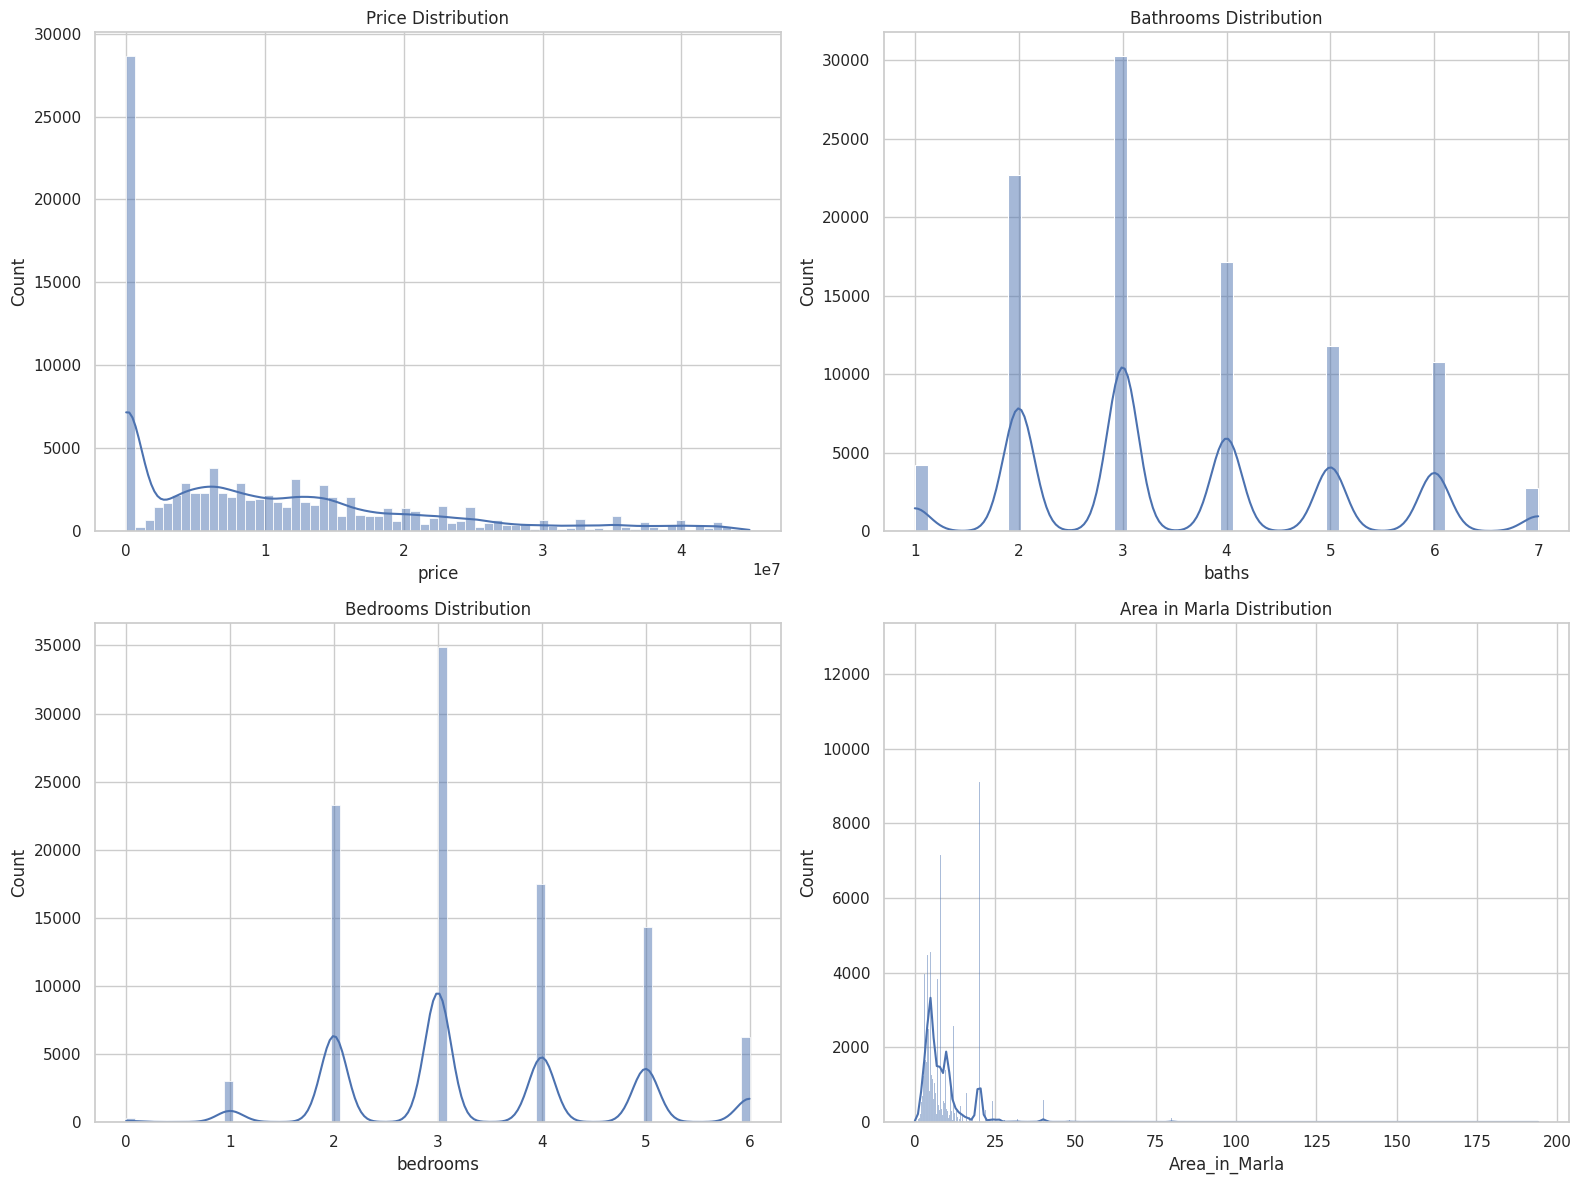

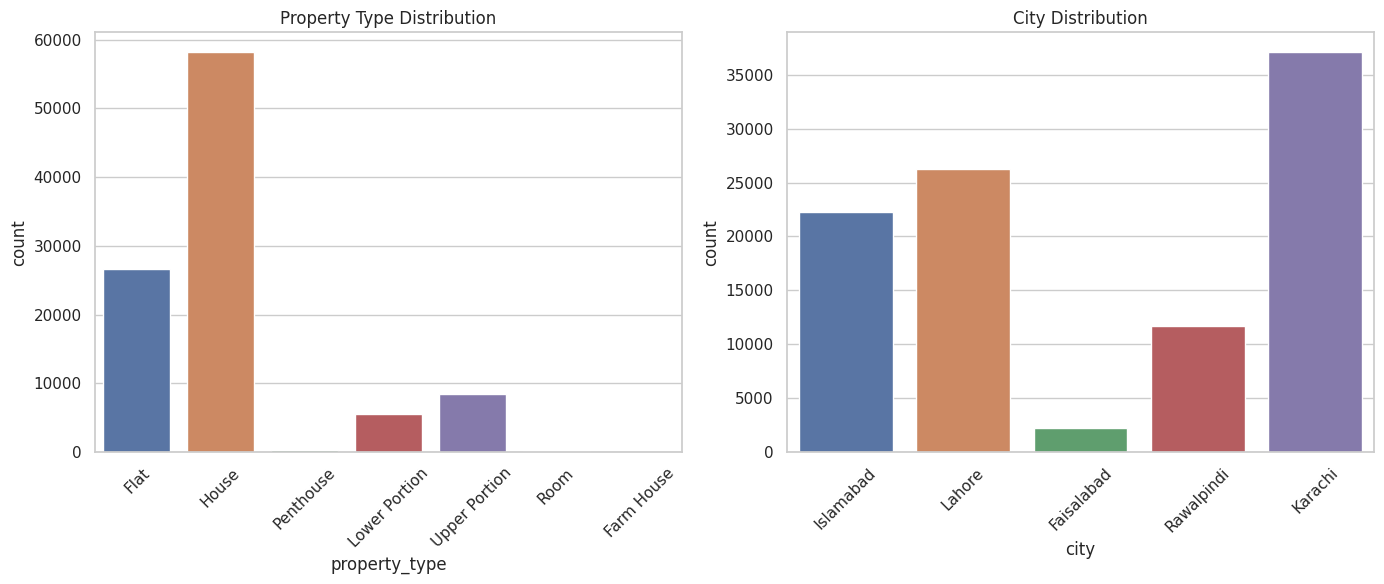

In [18]:
# Visualizations using Matplotlib and Seaborn

# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for numerical variables
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['baths'], kde=True)
plt.title('Bathrooms Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Area_in_Marla'], kde=True)
plt.title('Area in Marla Distribution')

plt.tight_layout()
plt.show()

# Bar charts for categorical variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='property_type', data=df)
plt.title('Property Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='city', data=df)
plt.title('City Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [19]:
import plotly.express as px

# Histograms for numerical variables
fig1 = px.histogram(df, x='price', title='Price Distribution')
fig2 = px.histogram(df, x='baths', title='Bathrooms Distribution')
fig3 = px.histogram(df, x='bedrooms', title='Bedrooms Distribution')
fig4 = px.histogram(df, x='Area_in_Marla', title='Area in Marla Distribution')

# Calculating the distribution for property types and cities
property_type_distribution = df['property_type'].value_counts()
city_distribution = df['city'].value_counts()

# Bar charts for categorical variables
fig5 = px.bar(property_type_distribution, title='Property Type Distribution')
fig5.update_xaxes(title='Property Type')
fig5.update_yaxes(title='Count')

fig6 = px.bar(city_distribution, title='City Distribution')
fig6.update_xaxes(title='City')
fig6.update_yaxes(title='Count')

# Scatter plots
fig7 = px.scatter(df, x='Area_in_Marla', y='price', title='Price vs. Area')
fig8 = px.scatter(df, x='bedrooms', y='baths', title='Bedrooms vs. Bathrooms')

# Displaying the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()

# BIVARATE ANALYSIS

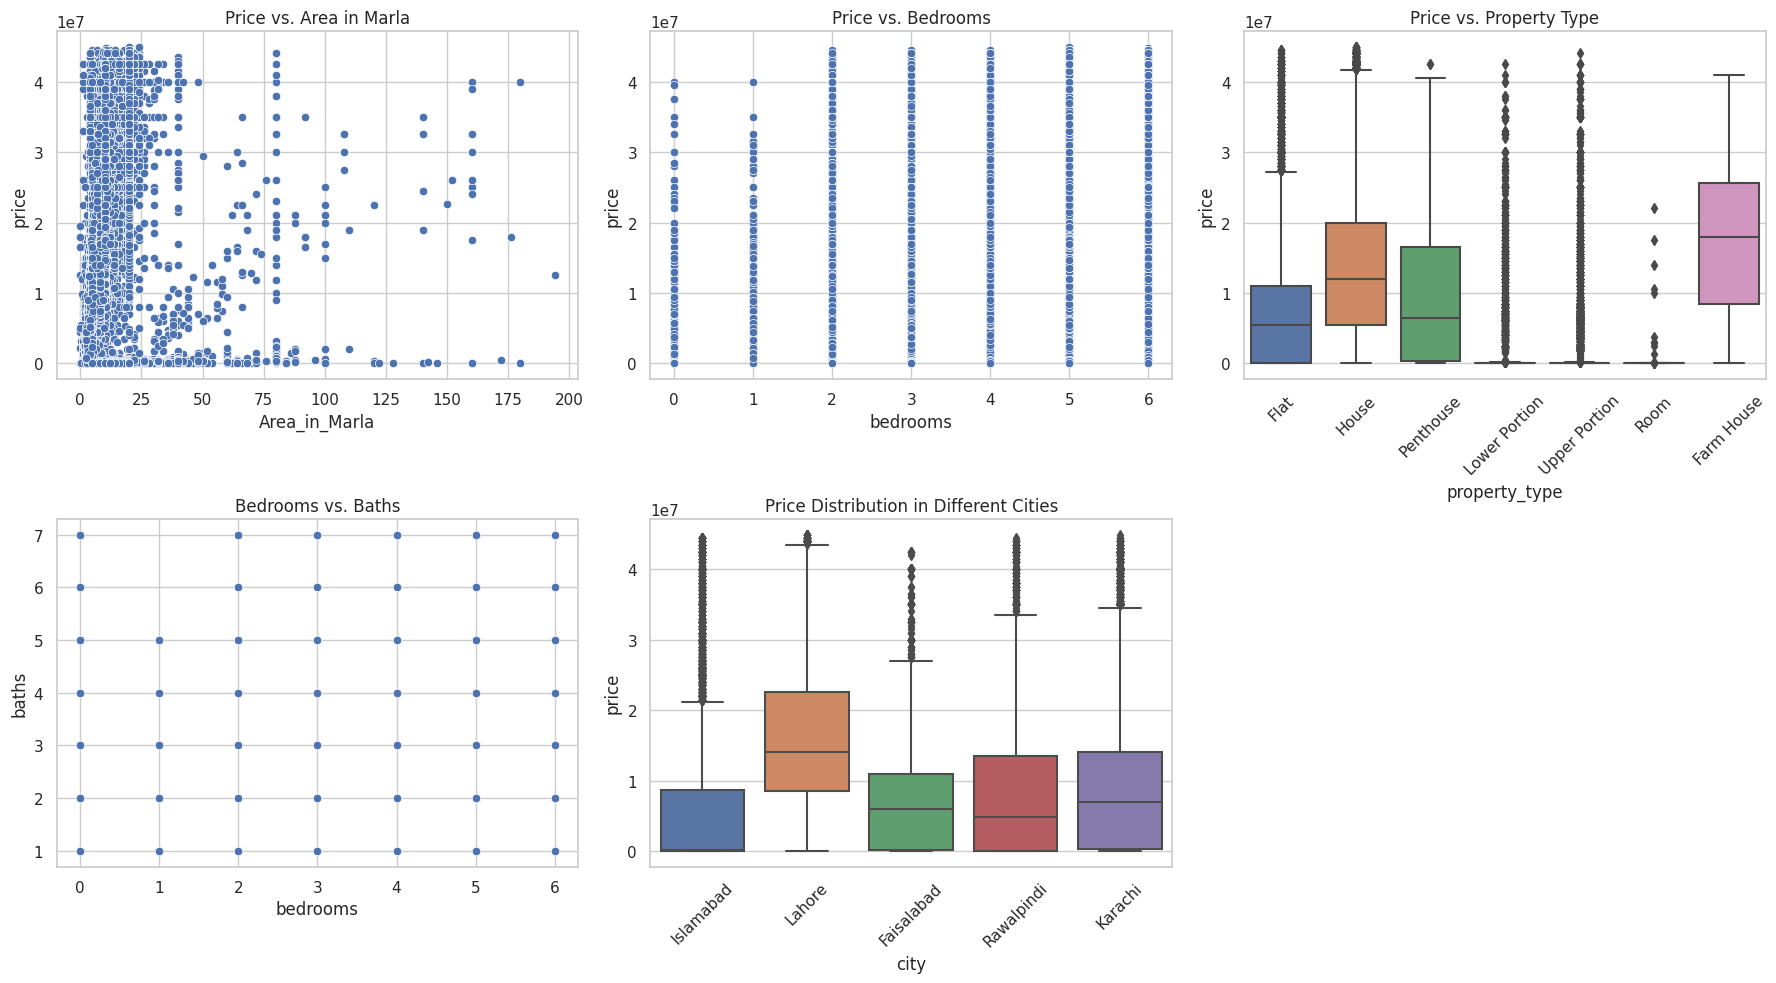

In [20]:
# Bivariate Analysis using Matplotlib and Seaborn

plt.figure(figsize=(18, 10))

# Scatter Plot: Price vs. Area in Marla
plt.subplot(2, 3, 1)
sns.scatterplot(x='Area_in_Marla', y='price', data=df)
plt.title('Price vs. Area in Marla')

# Scatter Plot: Price vs. Bedrooms
plt.subplot(2, 3, 2)
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Bedrooms')

# Box Plot: Price vs. Property Type
plt.subplot(2, 3, 3)
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Price vs. Property Type')
plt.xticks(rotation=45)

# Scatter Plot: Bedrooms vs. Baths
plt.subplot(2, 3, 4)
sns.scatterplot(x='bedrooms', y='baths', data=df)
plt.title('Bedrooms vs. Baths')

# Box Plot: Price Distribution in Different Cities
plt.subplot(2, 3, 5)
sns.boxplot(x='city', y='price', data=df)
plt.title('Price Distribution in Different Cities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## MULTIVARIATE USING PCA

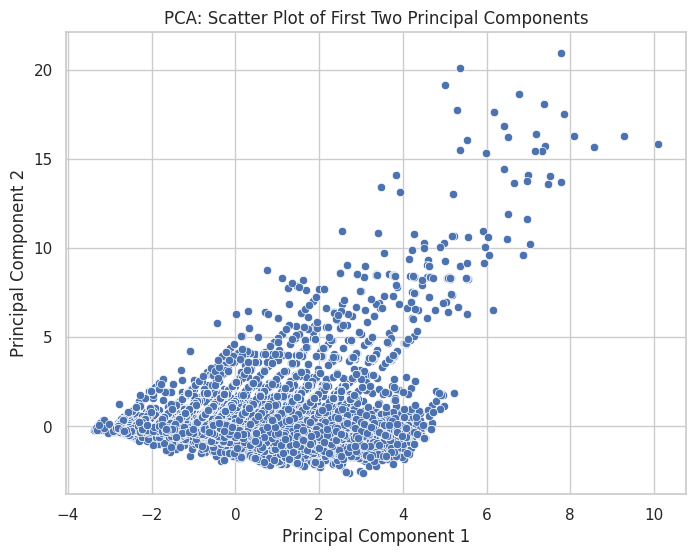

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame with the original data
numerical_data = df[['price', 'baths', 'bedrooms', 'Area_in_Marla']]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(len(numerical_data.columns))])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA: Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

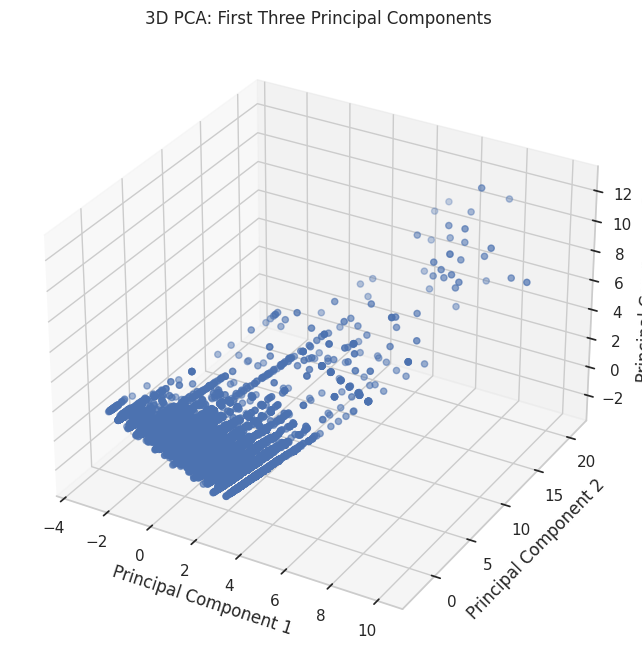

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

ax.set_title('3D PCA: First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


# DATA PREPROCESSING

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Correct file path
df_path = '/kaggle/input/house-prices-2023/house_prices.csv'  # Replace with the correct file path

# Load the dataset
df_updated = pd.read_csv(df_path)

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from numerical columns
numerical_cols = ['price', 'baths', 'bedrooms', 'Area_in_Marla']
for col in numerical_cols:
    df_updated = remove_outliers(df_updated, col)

# Encoding categorical data
categorical_cols = ['property_type', 'city', 'purpose']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df_updated[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded data with the rest of the dataframe
df_updated.reset_index(drop=True, inplace=True)
df_preprocessed = pd.concat([df_updated, encoded_df], axis=1)

# Drop the original categorical columns
df_preprocessed.drop(columns=categorical_cols, inplace=True)

df_preprocessed.head() if df_preprocessed is not None else "No data available for preprocessing."


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Unnamed: 0     price     location  baths  bedrooms  Area_in_Marla  \
0           0  10000000         G-10      2         2            4.0   
1           1   6900000         E-11      3         3            5.6   
2           2  16500000         G-15      6         5            8.0   
3           4   7000000  DHA Defence      3         3            8.0   
4           7   7800000         E-11      2         2            6.2   

   property_type_Farm House  property_type_Flat  property_type_House  \
0                       0.0                 1.0                  0.0   
1                       0.0                 1.0                  0.0   
2                       0.0                 0.0                  1.0   
3                       0.0                 0.0                  1.0   
4                       0.0                 1.0                  0.0   

   property_type_Lower Portion  property_type_Penthouse  property_type_Room  \
0                          0.0                      0.0                 0.0   
1                          0.0                      0.0                 0.0   
2                          0.0                      0.0                 0.0   
3                          0.0                      0.0                 0.0   
4                          0.0                      0.0                 0.0   

   property_type_Upper Portion  city_Faisalabad  city_Islamabad  city_Karachi  \
0                          0.0              0.0             1.0           0.0   
1                          0.0              0.0             1.0           0.0   
2                          0.0              0.0             1.0           0.0   
3                          0.0              0.0             1.0           0.0   
4                          0.0              0.0             1.0           0.0   

   city_Lahore  city_Rawalpindi  purpose_For Rent  purpose_For Sale  
0          0.0              0.0               0.0               1.0  
1          0.0              0.0               0.0               1.0  
2          0.0              0.0               0.0               1.0  
3          0.0              0.0               0.0               1.0  
4          0.0              0.0               0.0               1.0

#menghapus data yang tidak digunakan

In [24]:
df_preprocessed = df_preprocessed.drop("Unnamed: 0",axis=1)

## drop feature not using

In [25]:
df_preprocessed = df_preprocessed.drop("location",axis=1)

In [26]:
df_preprocessed.to_csv("houseprepro.csv",index=False)

## Split Of Data

In [27]:
dataset_train = df_preprocessed
X = dataset_train.drop('price' , axis =1)
y = dataset_train['price']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

dataset_test = df_preprocessed
dataset_test =dataset_test.drop(['price'] , axis = 1)
dataset_test.dropna(inplace = True)
dataset_test.head(5)

baths  bedrooms  Area_in_Marla  property_type_Farm House  \
0      2         2            4.0                       0.0   
1      3         3            5.6                       0.0   
2      6         5            8.0                       0.0   
3      3         3            8.0                       0.0   
4      2         2            6.2                       0.0   

   property_type_Flat  property_type_House  property_type_Lower Portion  \
0                 1.0                  0.0                          0.0   
1                 1.0                  0.0                          0.0   
2                 0.0                  1.0                          0.0   
3                 0.0                  1.0                          0.0   
4                 1.0                  0.0                          0.0   

   property_type_Penthouse  property_type_Room  property_type_Upper Portion  \
0                      0.0                 0.0                          0.0   
1                      0.0                 0.0                          0.0   
2                      0.0                 0.0                          0.0   
3                      0.0                 0.0                          0.0   
4                      0.0                 0.0                          0.0   

   city_Faisalabad  city_Islamabad  city_Karachi  city_Lahore  \
0              0.0             1.0           0.0          0.0   
1              0.0             1.0           0.0          0.0   
2              0.0             1.0           0.0          0.0   
3              0.0             1.0           0.0          0.0   
4              0.0             1.0           0.0          0.0   

   city_Rawalpindi  purpose_For Rent  purpose_For Sale  
0              0.0               0.0               1.0  
1              0.0               0.0               1.0  
2              0.0               0.0               1.0  
3              0.0               0.0               1.0  
4              0.0               0.0               1.0

##  Feature Selection Using ML

In [28]:
import plotly.express as px
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined in your environment

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Using Plotly to create a bar chart for feature importances
fig = px.bar(importances_df, 
             x='Importance', 
             y='Feature', 
             orientation='h', 
             color='Importance', 
             color_continuous_scale='Viridis')

# Updating layout for better readability
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Importance',
    yaxis_title='Feature',
    height=600
)

# Showing the Plotly figure
fig.show()

# Modeling Using Neural Network

In [29]:
!pip install tensorflow

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your preprocessed dataset
df_preprocessed = df_preprocessed

# Prepare the data
X = df_preprocessed.drop('price', axis=1)
y = df_preprocessed['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model = build_model(X_train_scaled.shape[1])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Epoch 1/100
1730/1730 [==============================] - 9s 3ms/step - loss: 171541899771904.0000 - val_loss: 171632664510464.0000
Epoch 2/100
1730/1730 [==============================] - 5s 3ms/step - loss: 162654337368064.0000 - val_loss: 156442153713664.0000
Epoch 3/100
1730/1730 [==============================] - 5s 3ms/step - loss: 141131601936384.0000 - val_loss: 129579985403904.0000
Epoch 4/100
1730/1730 [==============================] - 5s 3ms/step - loss: 111035851735040.0000 - val_loss: 98049925840896.0000
Epoch 5/100
1730/1730 [==============================] - 5s 3ms/step - loss: 81283346595840.0000 - val_loss: 71663592931328.0000
Epoch 6/100
1730/1730 [==============================] - 5s 3ms/step - loss: 60723057131520.0000 - val_loss: 56504988205056.0000
Epoch 7/100
1730/1730 [==============================] - 5s 3ms/step - loss: 50113686798336.0000 - val_loss: 48209791549440.0000
Epoch 8/100
1730/1730 [==============================] - 5s 3ms/step - loss: 4273838489600

# HYPERTUNING PARAMETER

In [31]:
!pip install keras-tuner

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from kerastuner.tuners import RandomSearch

# Load your preprocessed dataset
# df_preprocessed = pd.read_csv('path_to_your_preprocessed_dataset.csv')
df_preprocessed = df_preprocessed  # Assuming df_preprocessed is already loaded

# Prepare the data
X = df_preprocessed.drop('price', axis=1)
y = df_preprocessed['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', 
                    input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

# Hyperparameter tuner setup
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Set to a higher number for better optimization
    executions_per_trial=3,
    directory='model_tuning',
    project_name='house_price_prediction'
)

# Perform hyperparameter tuning
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
mse = best_model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)

print('Best Model Mean Squared Error:', mse)
print('Best Model Root Mean Squared Error:', rmse)

Trial 5 Complete [00h 02m 40s]
val_loss: 20827302352213.332

Best val_loss So Far: 20537029252437.332
Total elapsed time: 00h 13m 48s
541/541 [==============================] - 1s 2ms/step - loss: 19024754769920.0000
Best Model Mean Squared Error: 19024754769920.0
Best Model Root Mean Squared Error: 4361737.586091121


# Prediction Model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from kerastuner.tuners import RandomSearch

# Load your preprocessed dataset
# df_preprocessed = pd.read_csv('path_to_your_preprocessed_dataset.csv')
df_preprocessed = df_preprocessed  # Assuming df_preprocessed is already loaded

# Prepare the data
X = df_preprocessed.drop('price', axis=1)
y = df_preprocessed['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to build model with optimized hyperparameters
def build_optimized_model():
    # Assuming these are the optimized hyperparameters from Keras Tuner
    # Replace these values with the actual optimized hyperparameters
    optimized_units = 128  # example value
    optimized_learning_rate = 0.001  # example value

    model = Sequential()
    model.add(Dense(optimized_units, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(optimized_units, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer=Adam(learning_rate=optimized_learning_rate), loss='mean_squared_error')
    return model

# Build the optimized model
optimized_model = build_optimized_model()

# Train the optimized model
optimized_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the optimized model
mse = optimized_model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)

print('Optimized Model Mean Squared Error:', mse)
print('Optimized Model Root Mean Squared Error:', rmse)

# Making predictions
predictions = optimized_model.predict(X_test_scaled)

# Showing some example predictions
for i in range(5):
    print(f'Actual Price: {y_test.iloc[i]}, Predicted Price: {predictions[i][0]}')

Epoch 1/100
2162/2162 [==============================] - 7s 3ms/step - loss: 160766313365504.0000
Epoch 2/100
2162/2162 [==============================] - 6s 3ms/step - loss: 88177096261632.0000
Epoch 3/100
2162/2162 [==============================] - 6s 3ms/step - loss: 45845042954240.0000
Epoch 4/100
2162/2162 [==============================] - 5s 3ms/step - loss: 29819181989888.0000
Epoch 5/100
2162/2162 [==============================] - 5s 3ms/step - loss: 23396188422144.0000
Epoch 6/100
2162/2162 [==============================] - 6s 3ms/step - loss: 21785334513664.0000
Epoch 7/100
2162/2162 [==============================] - 6s 3ms/step - loss: 21029313314816.0000
Epoch 8/100
2162/2162 [==============================] - 6s 3ms/step - loss: 20555365351424.0000
Epoch 9/100
2162/2162 [==============================] - 6s 3ms/step - loss: 20245517434880.0000
Epoch 10/100
2162/2162 [==============================] - 6s 3ms/step - loss: 20038111199232.0000
Epoch 11/100
2162/2162 [====

# Modeling Using Machine Learning

# Support Vector Machine

In [34]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Create and fit the SVR (Support Vector Regressor) model with default parameters
SV = svm.SVR()
SV.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(SV, X_train, y_train, cv=10)
mean_score = scores.mean()

print("Score:", mean_score)

Score: -0.03659909149350789


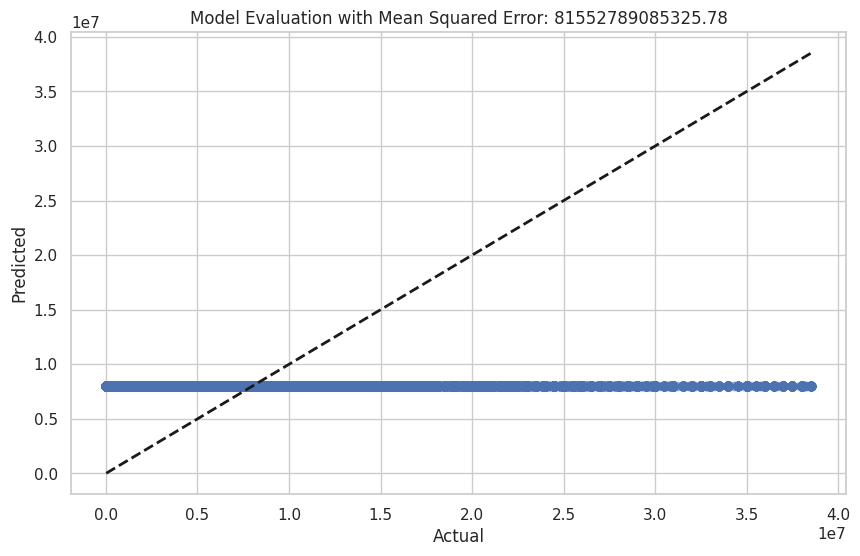

Mean Squared Error: 81552789085325.78


In [35]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming SV is your trained model, and X_train, y_train are your training data and labels
# Replace 'SV' with the variable name of your trained model

# Predicting on the training data
y_pred = SV.predict(X_train)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Model Evaluation with Mean Squared Error: {mse:.2f}')
plt.show()

print("Mean Squared Error:", mse)

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the DecisionTreeRegressor model with default parameters
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(DTR, X_train, y_train, cv=10)
mean_score2 = scores.mean()

print("Score:", mean_score2)

Score: 0.799666600695174


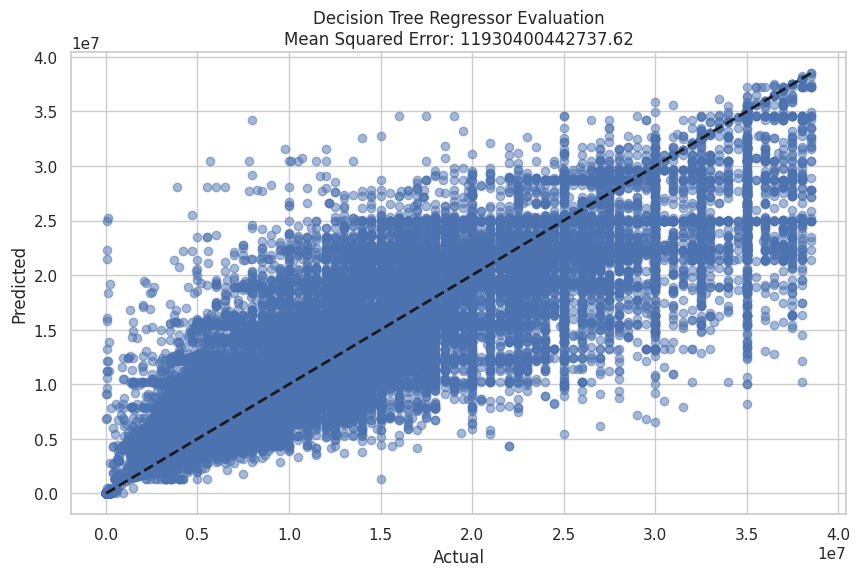

11930400442737.615

In [37]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Predicting on the training data
y_pred_dtr = DTR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the Decision Tree Regressor
mse_dtr = mean_squared_error(y_train, y_pred_dtr)

# Plotting the actual vs predicted values for the Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_dtr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Decision Tree Regressor Evaluation\nMean Squared Error: {mse_dtr:.2f}')
plt.show()

mse_dtr

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the RandomForestRegressor model with default parameters
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(RFR, X_train, y_train, cv=10)
mean_score_rf = scores.mean()

mean_score_rf

0.8114536932830774

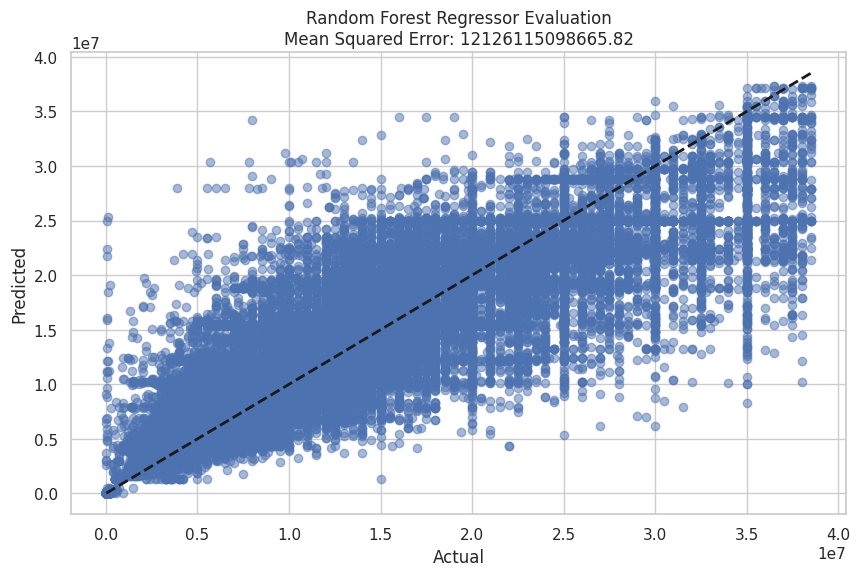

12126115098665.822

In [39]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming the RandomForestRegressor model 'RFR' is already trained

# Predicting on the training data
y_pred_rfr = RFR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the RandomForest Regressor
mse_rfr = mean_squared_error(y_train, y_pred_rfr)

# Plotting the actual vs predicted values for the RandomForest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_rfr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest Regressor Evaluation\nMean Squared Error: {mse_rfr:.2f}')
plt.show()

mse_rfr

# Hypertuning Parameter Algoritma Terbaik

In [40]:
params ={
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]                          #bootstrap: Whether to bootstrap samples when building trees.
}
random_search = RandomizedSearchCV(
    estimator=RFR,
    param_distributions=params,
    n_iter=10,                                 # Number of random combinations to try
    cv=10,                                     # Number of cross-validation folds
    scoring="neg_mean_squared_error",          # Scoring metric
    n_jobs=-1,                                 # Use all available CPU cores
    random_state=42
)
random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [41]:
random_search_rf_results = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["neg_mean_squared_error"])],axis=1)
random_search_rf_contour = random_search_rf_results.groupby(['max_depth','n_estimators']).mean()
random_search_rf_contour

min_samples_split  min_samples_leaf  \
max_depth n_estimators                                        
5         100                         3.0          2.333333   
          500                         4.0          2.333333   
10        100                         5.0          1.000000   
          500                         3.5          1.000000   
20        500                        10.0          2.000000   

                        neg_mean_squared_error  
max_depth n_estimators                          
5         100                    -1.914606e+13  
          500                    -1.914082e+13  
10        100                    -1.506797e+13  
          500                    -1.506330e+13  
20        500                    -1.453247e+13

In [42]:
RF = RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=1000) 
RF.fit(X_train , y_train)
scores = cross_val_score(RF, X_train, y_train, cv=10)
print(scores)
print("\n mean of the Scores :" , scores.mean())

[0.80801607 0.80614012 0.81208848 0.81270166 0.80872698 0.82128228
 0.81230729 0.81114993 0.80958679 0.81063883]

 mean of the Scores : 0.8112638423937863


# Prediction Model

In [43]:
#np.set_printoptions(threshold=np.inf)
predict = RF.predict(dataset_test)
min = np.amin(predict)
max = np.amax(predict)
range = np.ptp(predict)
mean = np.mean(predict)
median = np.median(predict)
 
print("min =", min)
print("max =", max)
print("Median =", median)
print("Mean =", mean)
print("range =", range)
print("\nprediction =", predict)

min = 16891.005952380947
max = 37259917.655665025
Median = 8598819.850149848
Mean = 9713350.078719797
range = 37243026.649712645

prediction = [ 6143573.10038589  6868739.40515872 22742749.36127669 ...
 15420395.08487802 15618237.22210514  9493938.40173395]
